In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_nasabah.csv")
df.head()

,Unnamed: 0,debtor_gender,age,debtor_education_level,debtor_martial_status,employment_type,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_risk,credit_score,arrears_amounts,aset,loss_reverse,aging
0,0,Wanita,80,D3,Sudah menikah,Retired,3,15500000.0,4,1.562500e+07,29500000,24350000,2,1,Tertagih,670,0,11000000,0.000000e+00,DPK
1,1,Pria,44,D3,Sudah menikah,Full-time,3,17500000.0,8,1.770833e+07,3000000,1600000,31,3,Tertagih,402,1,17000000,1.770833e+07,DPK
2,2,Pria,35,D2,Sudah menikah,Full-time,4,17500000.0,8,1.483333e+07,13500000,9050000,0,0,Tertagih,505,0,14500000,0.000000e+00,Lancar
3,3,Wanita,53,D2,Sudah menikah,Retired,3,15500000.0,7,1.529167e+07,10500000,8350000,64,5,Tertagih,508,1,11500000,1.529167e+07,DPK
4,4,Pria,24,SMA,Sudah menikah,Contract,5,8700000.0,9,1.404167e+07,6500000,5750000,14,2,Tertagih,371,0,5500000,0.000000e+00,DPK


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   debtor_gender               5000 non-null   object 
 2   age                         5000 non-null   int64  
 3   debtor_education_level      5000 non-null   object 
 4   debtor_martial_status       5000 non-null   object 
 5   employment_type             5000 non-null   object 
 6   number_of_dependents        5000 non-null   int64  
 7   net_income                  5000 non-null   float64
 8   payment_date                5000 non-null   int64  
 9   loan_amount                 5000 non-null   float64
 10  avg_amounts_previous_bills  5000 non-null   int64  
 11  avg_previous_payment        5000 non-null   int64  
 12  amount_of_late              5000 non-null   int64  
 13  late_payment_amount         5000 

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["credit_risk", "Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   debtor_gender               5000 non-null   category
 1   age                         5000 non-null   int64   
 2   debtor_education_level      5000 non-null   category
 3   debtor_martial_status       5000 non-null   category
 4   employment_type             5000 non-null   category
 5   number_of_dependents        5000 non-null   int64   
 6   net_income                  5000 non-null   float64 
 7   payment_date                5000 non-null   int64   
 8   loan_amount                 5000 non-null   float64 
 9   avg_amounts_previous_bills  5000 non-null   int64   
 10  avg_previous_payment        5000 non-null   int64   
 11  amount_of_late              5000 non-null   int64   
 12  late_payment_amount         5000 non-null   int64   
 13  credit_score      

In [5]:
aging = {"Lancar": 0, "DPK": 1, "Kurang lancar": 2, "Diragukan": 3, "Macet": 4}
debtor_gender = {"Pria": 0, "Wanita": 1}
debtor_education_level = {"SD": 0, "SMP": 1, "SMA": 2, "D1": 3, "D2": 4, "D3": 5, "S1": 6, "S2": 7, "S3": 8}
debtor_martial_status = {"Belum menikah": 0, "Sudah menikah": 1}
debtor_island = {"Jawa": 0, "Sumatra": 1, "Sulawesi": 2, "Kalimantan": 3, "Papua": 4}
employment_type = {"Not-employed": 0, "Self-employed": 1, "Internship": 2, "Part-time": 3, "Contract": 4, "Full-time": 5, "Retired": 6}
columns = {"aging" : aging, "debtor_gender": debtor_gender, "debtor_education_level": debtor_education_level,
           "debtor_martial_status": debtor_martial_status, "employment_type": employment_type}

for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,age,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,aging,debtor_gender,debtor_education_level,debtor_martial_status,employment_type
0,1.000000,0.0,0.000000,-0.25,0.190476,1.24,1.431472,-0.800000,-0.6,1.589041,-1.0,0.6,-0.928218,1,1,5,1,6
1,-0.161290,0.0,0.266667,0.75,0.984127,-0.88,-0.878173,-0.413333,-0.2,0.365297,0.0,1.8,0.123762,1,0,5,1,5
2,-0.451613,0.5,0.266667,0.75,-0.111111,-0.04,-0.121827,-0.826667,-0.8,0.835616,-1.0,1.3,-0.928218,0,0,4,1,5
3,0.129032,0.0,0.000000,0.50,0.063492,-0.28,-0.192893,0.026667,0.2,0.849315,0.0,0.7,-0.019802,1,1,4,1,6
4,-0.806452,1.0,-0.906667,1.00,-0.412698,-0.60,-0.456853,-0.640000,-0.4,0.223744,-1.0,-0.5,-0.928218,1,0,2,1,4


In [6]:
y = df2["loss_reverse"]
X = df2.drop("loss_reverse", axis=1)
pca = PCA()
pca.fit(X)

PCA()

In [7]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

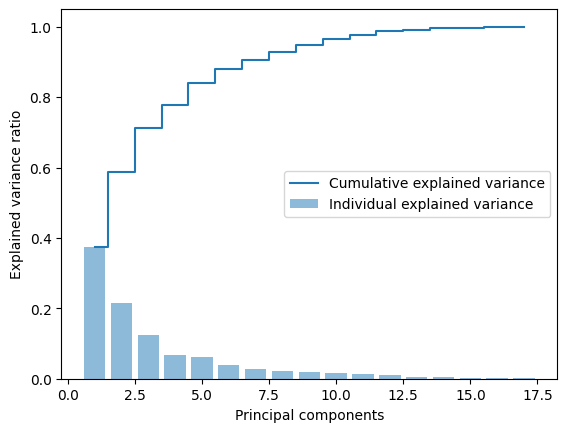

In [8]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [9]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 10
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: debtor_gender, age, debtor_martial_status, credit_score, avg_previous_payment, avg_amounts_previous_bills, employment_type, net_income, debtor_education_level, loan_amount
Komponen Utama 2: credit_score, debtor_gender, number_of_dependents, debtor_martial_status, avg_previous_payment, avg_amounts_previous_bills, age, loan_amount, employment_type, debtor_education_level
Komponen Utama 3: avg_previous_payment, avg_amounts_previous_bills, debtor_education_level, debtor_gender, number_of_dependents, credit_score, late_payment_amount, amount_of_late, aging, arrears_amounts
Komponen Utama 4: debtor_martial_status, net_income, credit_score, number_of_dependents, debtor_gender, loan_amount, age, debtor_education_level, employment_type, aset
Komponen Utama 5: credit_score, debtor_gender, avg_amounts_previous_bills, avg_previous_payment, loan_amount, age, number_of_dependents, aset, debtor_education_level, employment_type
Komponen Utama 6: credi

In [10]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 12


In [11]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(X, y) 

In [12]:
filterr = select.get_support()
features[filterr]

array(['net_income', 'loan_amount', 'avg_amounts_previous_bills',
       'avg_previous_payment', 'amount_of_late', 'late_payment_amount',
       'credit_score', 'arrears_amounts', 'aging',
       'debtor_education_level'], dtype=object)

In [13]:
num_features_to_select = 10
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)



In [14]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 net_income
2 loan_amount
3 avg_amounts_previous_bills
4 avg_previous_payment
5 amount_of_late
6 late_payment_amount
7 credit_score
8 arrears_amounts
9 aging
10 employment_type


In [15]:
columns2 = {"aging" : {j:i for i, j in aging.items()},
           "debtor_gender": {j:i for i, j in debtor_gender.items()}, 
           "debtor_education_level": {j:i for i, j in debtor_education_level.items()},
           "debtor_martial_status": {j:i for i, j in debtor_martial_status.items()}, 
           "employment_type": {j:i for i, j in employment_type.items()}}

for i in columns2:
    df2[i] = [columns2[i][j] for j in df2[i]]

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,age,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,aging,debtor_gender,debtor_education_level,debtor_martial_status,employment_type
0,80.0,3.0,15500000.0,4.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,11000000.0,0.000000e+00,DPK,Wanita,D3,Sudah menikah,Retired
1,44.0,3.0,17500000.0,8.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,17000000.0,1.770833e+07,DPK,Pria,D3,Sudah menikah,Full-time
2,35.0,4.0,17500000.0,8.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,14500000.0,0.000000e+00,Lancar,Pria,D2,Sudah menikah,Full-time
3,53.0,3.0,15500000.0,7.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,11500000.0,1.529167e+07,DPK,Wanita,D2,Sudah menikah,Retired
4,24.0,5.0,8700000.0,9.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,5500000.0,0.000000e+00,DPK,Pria,SMA,Sudah menikah,Contract


In [16]:
df_new = df2[selected_feature_names]
df_new["loss_reverse"] = df2["loss_reverse"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_2984\2143404179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["loss_reverse"] = df2["loss_reverse"]


,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,DPK,Retired,0.000000e+00
1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,DPK,Full-time,1.770833e+07
2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,Lancar,Full-time,0.000000e+00
3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,DPK,Retired,1.529167e+07
4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,DPK,Contract,0.000000e+00


In [18]:
df_new.to_csv("./data_baru/new_data.csv")